In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv")

In [3]:
x.head()

,0.07184119218267622,0.8553524138064769,-0.3055966142959303,0.028252569993086545,1.8268953710701943
0,0.139521,-0.423507,0.461059,-0.447400,-0.034988
1,1.626311,-0.257622,-0.697520,1.413219,1.086292
2,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
3,-0.783365,-0.861232,0.951448,-0.117306,0.680597
4,3.077357,0.948615,-0.295527,1.390358,-0.116174


In [15]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv",
                header=None)
y = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_y.csv",
                header=None)

In [16]:
>>> x.shape, y.shape
((387, 5), (387, 1))

((387, 5), (387, 1))

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
binary = LinearRegression()

In [9]:
binary.fit(x[[1]], y)

LinearRegression()

In [10]:
binary.coef_

array([[95.52010745]])

In [11]:
binary.predict(x[[1]])

array([[  81.7066754 ],
       [ -40.45008468],
       [ -24.60472955],
       [ -78.92903986],
       [ -82.26167214],
       [  90.61516808],
       [   3.20559483],
       [ -27.39642608],
       [  77.03125467],
       [ -81.79074091],
       [ -57.11517633],
       [  71.55969853],
       [ -51.83704209],
       [  13.20326205],
       [ -20.052765  ],
       [ 125.1294343 ],
       [ -85.37964253],
       [ -67.97795874],
       [  62.50833807],
       [  67.06343892],
       [ -62.27425459],
       [ -80.86610767],
       [ -27.05138056],
       [ -52.78366471],
       [  35.41921651],
       [ -79.36741675],
       [  56.64287014],
       [  79.27353864],
       [ -35.49555901],
       [-221.02386024],
       [ -80.76607115],
       [ 165.15522994],
       [  32.58309404],
       [ -35.52849481],
       [ -96.01738449],
       [ -42.18812152],
       [ -48.92932082],
       [ -75.29745421],
       [  14.5207672 ],
       [  38.22303712],
       [  -5.81538928],
       [ -10.783

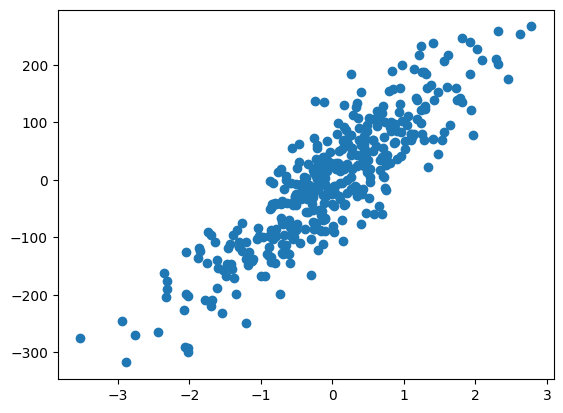

In [12]:
plt.scatter(x[1], y)

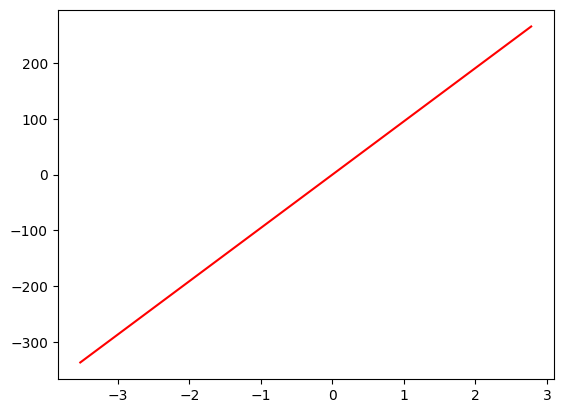

In [13]:
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [16]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

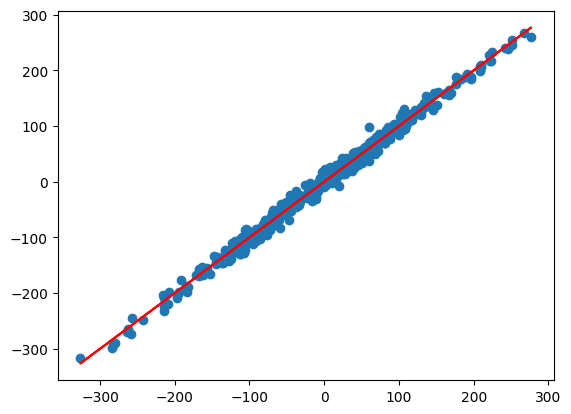

In [17]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

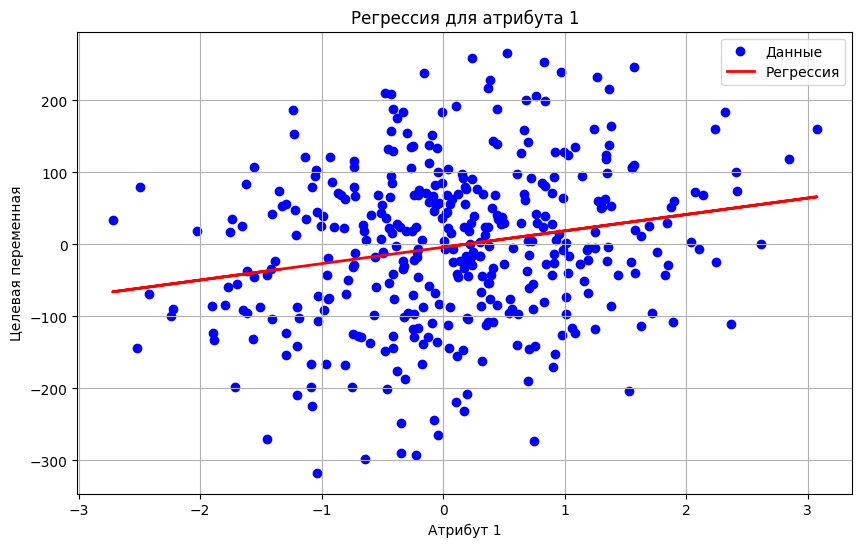

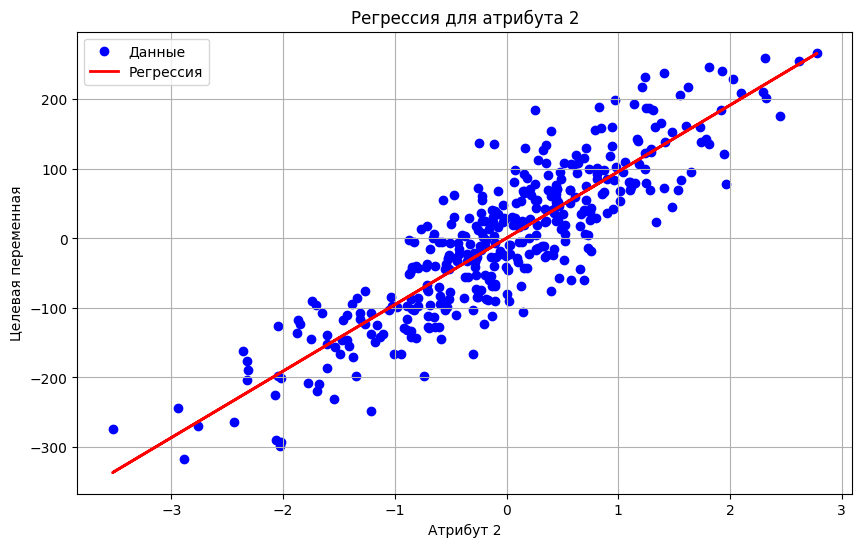

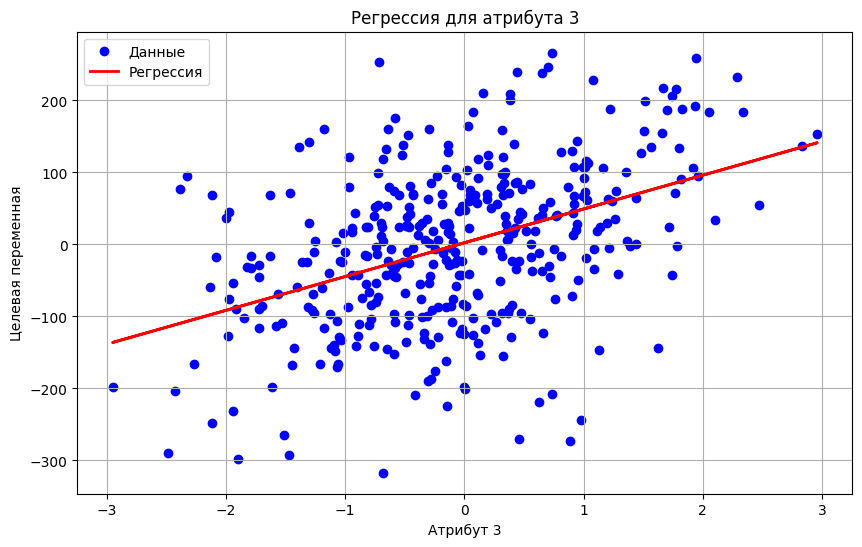

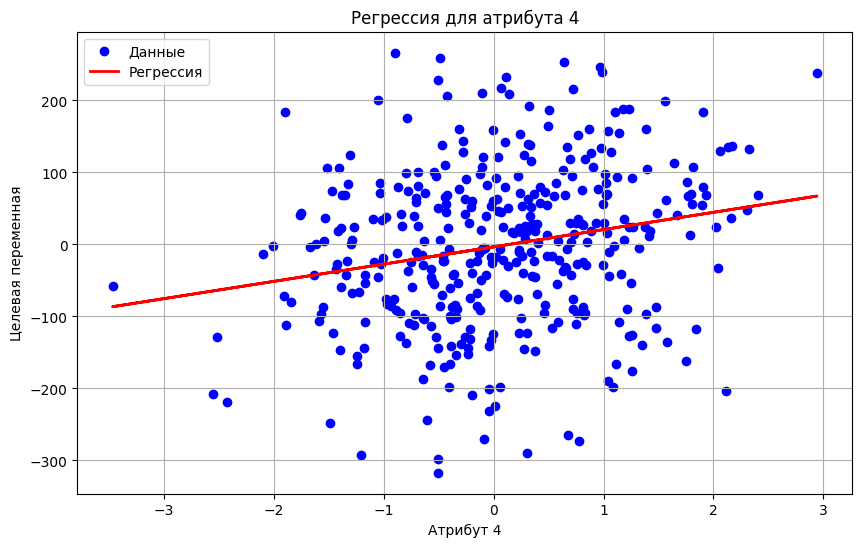

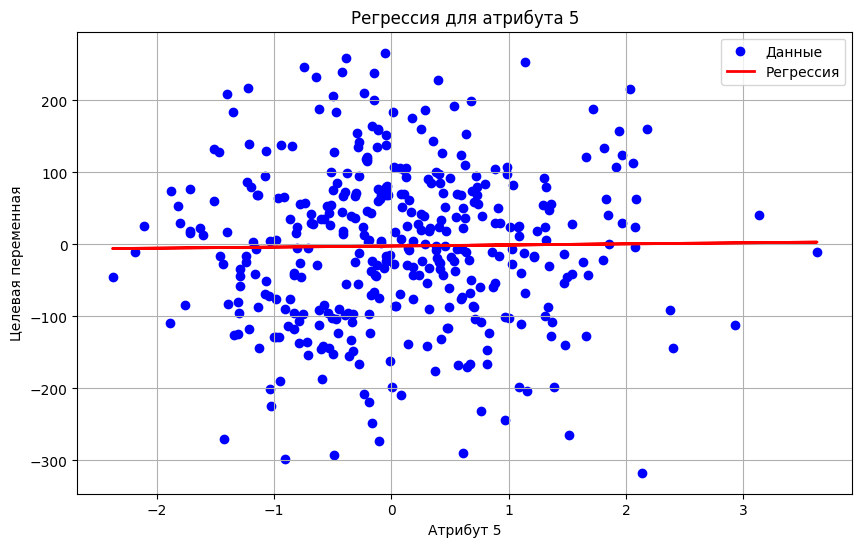

In [28]:
for i in range(X.shape[1]):  # Перебираем все столбцы X
    attribute = X.iloc[:, i].values.reshape(-1, 1)  # Извлекаем столбец в виде массива
    target = Y.values
    
    model = LinearRegression()
    model.fit(attribute, target)
    
    predictions = model.predict(attribute)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(attribute, target, color='blue', label='Данные')
    plt.plot(attribute, predictions, color='red', linewidth=2, label='Регрессия')
    plt.title(f'Регрессия для атрибута {i + 1}')
    plt.xlabel(f'Атрибут {i + 1}')
    plt.ylabel('Целевая переменная')
    plt.legend()
    plt.grid()
    plt.show()

2. (*) Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.

In [17]:
class MultipleRegression(object):
    def __init__(self):
        self.b = None
    
    def predict(self, X):
        return x @ self.b
    
    def MSE(self, x, y):
        return (((y - self.predict(x)).T@(y - self.predict(x))) / (2 * x.shape[0])).values
    
    def MAE(self, x, y):
        return (abs(y - self.predict(x)).mean()).values
    
    def MAPE(self, x, y):
        return (abs((y - self.predict(x)/y)).mean()).values
    
    def coefs(self):
        return self.b
    
    def fit(self, x, y, alpha=0.01, epsylon=0.01, max_steps=10000, intercept=True):
        if intercept:
            x['intercept'] = 1
        
        self.b = np.zeros((x.shape[1], 1))
        steps, errors = [], []
        step = 0        
        
        for _ in range(max_steps):
            dJ_b = -1*(x.T@(y - self.predict(x)))/x.shape[0]
            self.b -= alpha * dJ_b
            new_err = self.MSE(x, y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
            
            if new_err < epsylon:
                break
        return steps, errors

In [18]:
reg = MultipleRegression()
reg.fit(x, y)
predictions = reg.predict(X)

print("Предсказанные значения:", predictions)

Предсказанные значения:               0
0     70.512129
1    -33.506476
2     20.117187
3   -112.268539
4    -60.520968
..          ...
382  209.138356
383  207.955475
384  129.381449
385 -242.793911
386   68.731542

[387 rows x 1 columns]


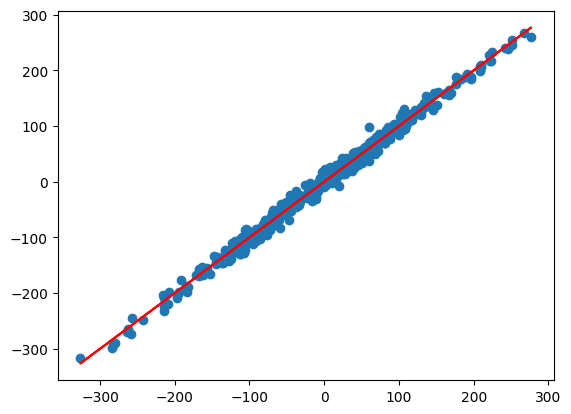

In [24]:
plt.scatter(predictions, y)
plt.plot(predictions, predictions, c='r')

3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [26]:
# Модель полиномиальной регрессии
def polynomial_regression(X, Y, degree):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, Y)
    y_pred = model.predict(X_poly)

    # Оценка качества
    r2 = r2_score(Y, y_pred)

    return model, r2, y_pred

Порядок 2: R^2 = 0.9926004162659386


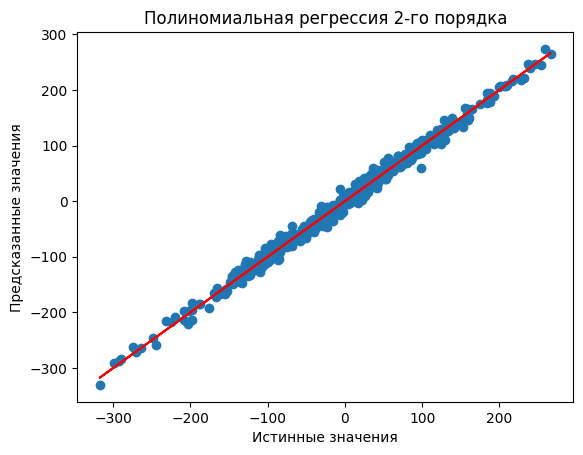

Порядок 3: R^2 = 0.9931922368118391


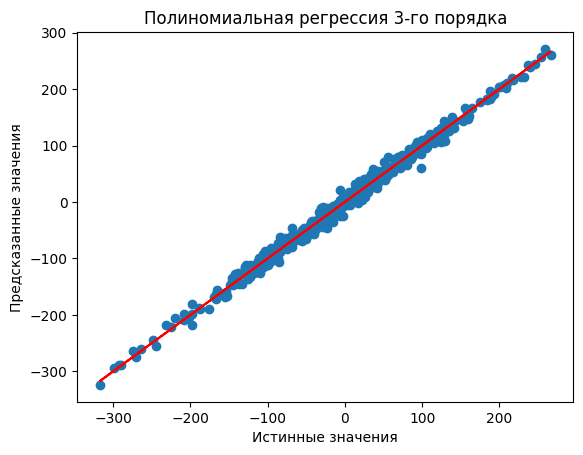

Порядок 10: R^2 = 1.0


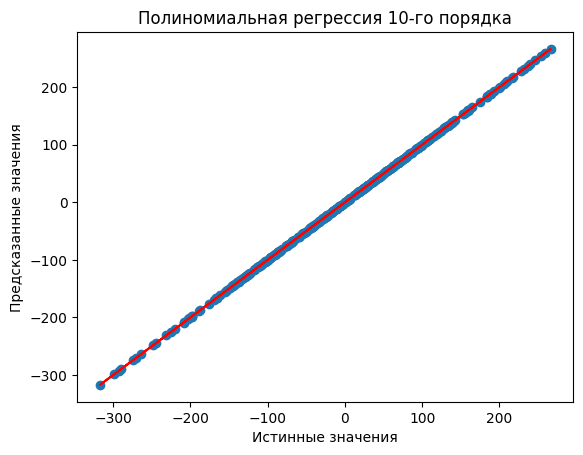

In [27]:
# Построим полиномиальные регрессии 2-го, 3-го и 10-го порядков
degrees = [2, 3, 10]
r2_scores = []

for degree in degrees:
    model, r2, y_pred = polynomial_regression(X, Y, degree)
    r2_scores.append(r2)
    print(f"Порядок {degree}: R^2 = {r2}")
    
    # Визуализация
    plt.scatter(Y, y_pred)
    plt.plot(Y, Y, color='red')
    plt.title(f'Полиномиальная регрессия {degree}-го порядка')
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.show()

In [28]:
# Вывод значимости регрессии
for degree, r2 in zip(degrees, r2_scores):
    print(f"Порядок полинома: {degree}, Коэффициент детерминации R^2: {r2}")

Порядок полинома: 2, Коэффициент детерминации R^2: 0.9926004162659386
Порядок полинома: 3, Коэффициент детерминации R^2: 0.9931922368118391
Порядок полинома: 10, Коэффициент детерминации R^2: 1.0


4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [29]:
def polynomial_regression_custom(X, Y, degree):
    poly = PolynomialFeatures(degree)
    X_poly = pd.DataFrame(poly.fit_transform(X))  # Преобразуем X в полиномиальные признаки

    model = MultipleRegression()
    model.fit(X_poly, Y)
    y_pred = model.predict(X_poly)
    
    # Рассчитаем метрики через методы вашего класса
    mse = model.MSE(X_poly, Y)[0][0]  # Берем первый элемент, так как возвращается массив
    mae = model.MAE(X_poly, Y)[0][0]
    mape = model.MAPE(X_poly, Y)[0][0]
    
    return model, mse, mae, mape, y_pred

In [30]:
# Создаем сводную таблицу для хранения метрик
metrics_table = pd.DataFrame(columns=['Порядок полинома', 'MSE', 'MAE', 'MAPE'])

# Порядки полинома
degrees = [2, 3, 10]